# Credit Card Fraud Analysis and Modeling
From traditional to emerging sectors, there is not one single business that is fully immune from fraud. Some studies show that frauds of various kinds could cost businesses 1%-1.75% of their annual sales, this translates to around $200 billion a year!

As one of the most common types of fraudulent activities, credit card transaction fraud impacts around 127 million people, or approximately $8 billion in attempted fraudulent charges on Americans’ credit and debit cards. It is therefore imperative for credit card companies to understand the characteristics of a fraudulent transaction and develop predictive models accordingly to flag down potentially risky activities for fraud prevention

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df=pd.read_csv(os.path.join('drive/MyDrive/CredirCard/archive (3)/fraudTest.csv'),low_memory=False)

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


1. ## Transaction amount vs Fraud

In [7]:
pd.crosstab(df['amt'],df["is_fraud"])

is_fraud,0,1
amt,,
1.00,110,0
1.01,212,0
1.02,203,0
1.03,227,0
1.04,206,0
...,...,...
16339.26,1,0
16837.08,1,0
19364.91,1,0


Describing amount that have been transferred

In [8]:
df["amt"].describe()

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: amt, dtype: float64

In [9]:
np.percentile(df["amt"],99)

519.8545999999985

Text(0, 0.5, 'Percentage')

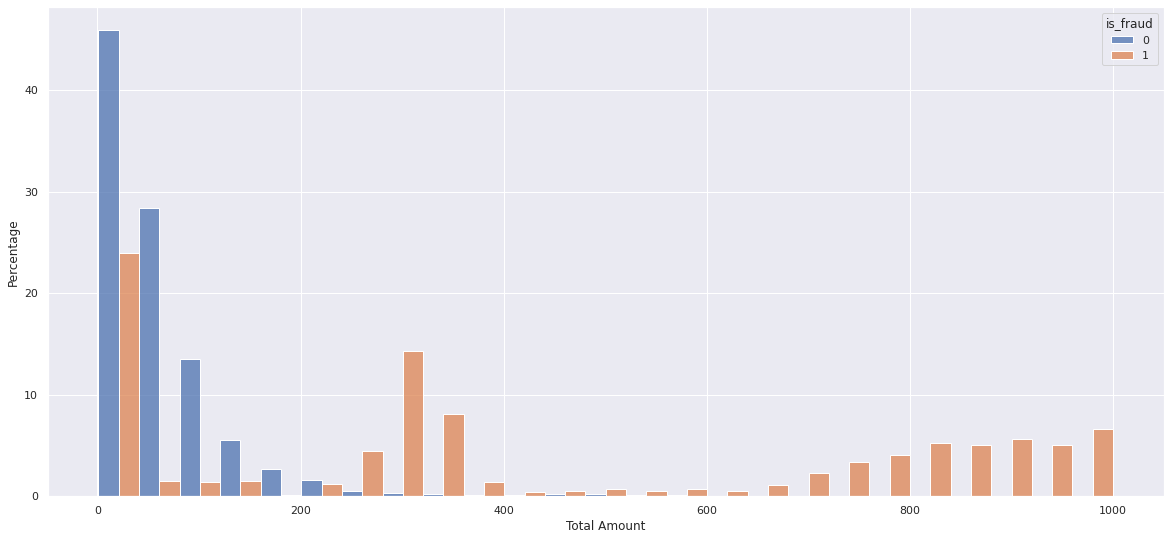

In [10]:
## Amount vs fraud
sns.set(rc={'figure.figsize':(20,9)})
ax=sns.histplot(x="amt",data=df[df.amt<=1000],hue="is_fraud",bins=25,multiple="dodge",stat='percent',common_norm=False)
ax.set_xlabel("Total Amount")
ax.set_ylabel("Percentage")


~WE can see that after 400$ there is good trend 

## Gender vs Fraud

In [11]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


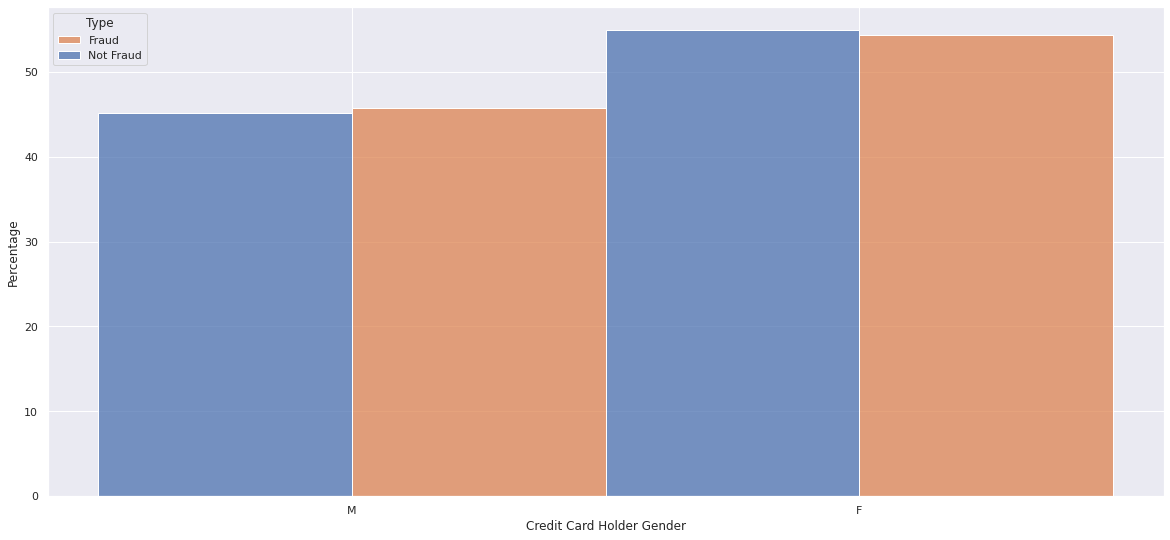

In [12]:
ax=sns.histplot(x="gender",data=df,hue="is_fraud",stat="percent",multiple="dodge",common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [13]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [14]:
df.category.value_counts()

gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: category, dtype: int64

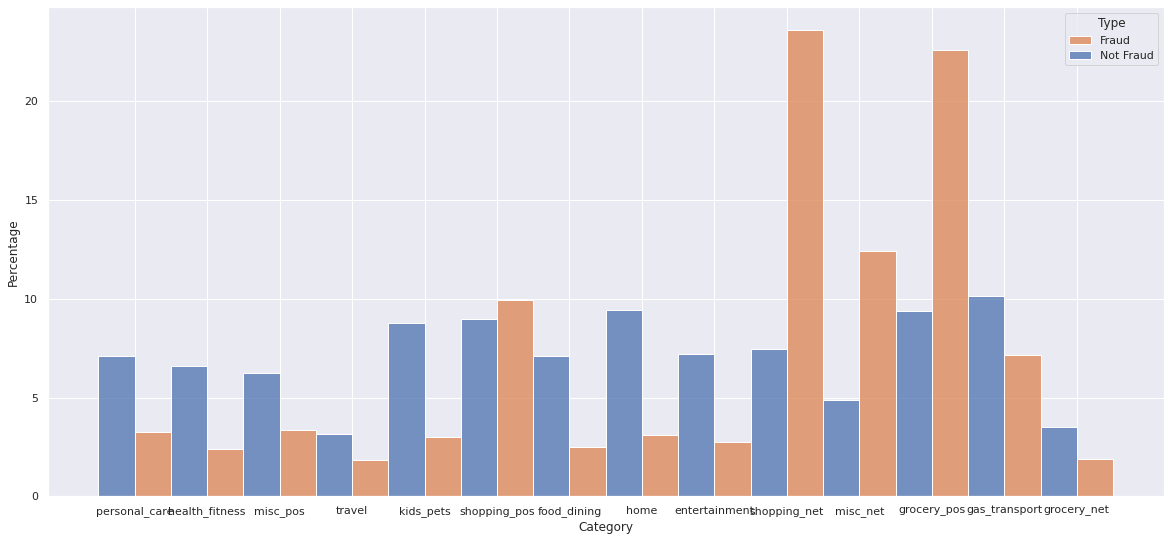

In [15]:
ax=sns.histplot(x="category",data=df,hue="is_fraud",common_norm=False,multiple='dodge',stat='percent')
ax.set_ylabel('Percentage')
ax.set_xlabel('Category')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Some spending categories indeed see more fraud than others! Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', and 'misc_net' while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

## Age vs fraud

In [16]:
import datetime as dt
df["age"]=dt.date.today().year-pd.to_datetime(df["dob"]).dt.year

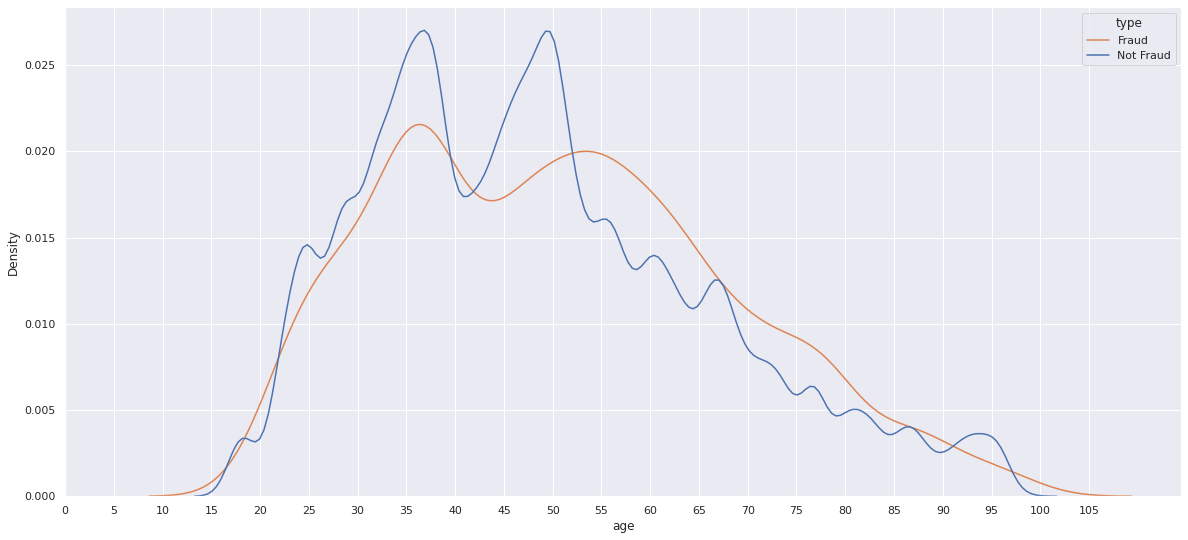

In [17]:
ax=sns.kdeplot(data=df, x="age", hue="is_fraud",common_norm=False)
plt.xticks(np.arange(0,110,5));
plt.legend(title="type",labels=["Fraud","Not Fraud"])

## Hours vs Fraud

In [18]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,54
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,32
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,52
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,35
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,67


In [19]:
df["Hour"]=pd.to_datetime(df["trans_date_trans_time"]).dt.hour

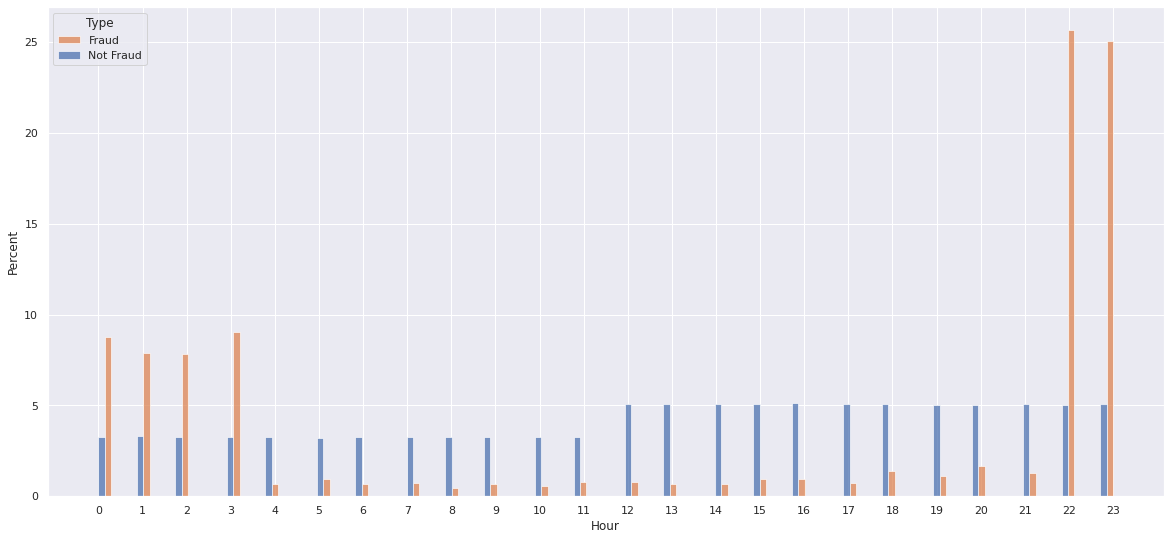

In [20]:
ax=sns.histplot(x="Hour",data=df,hue="is_fraud",common_norm=False,multiple='dodge',stat='percent')
plt.xticks(np.arange(0,24,1));
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

## Day vs Fraud

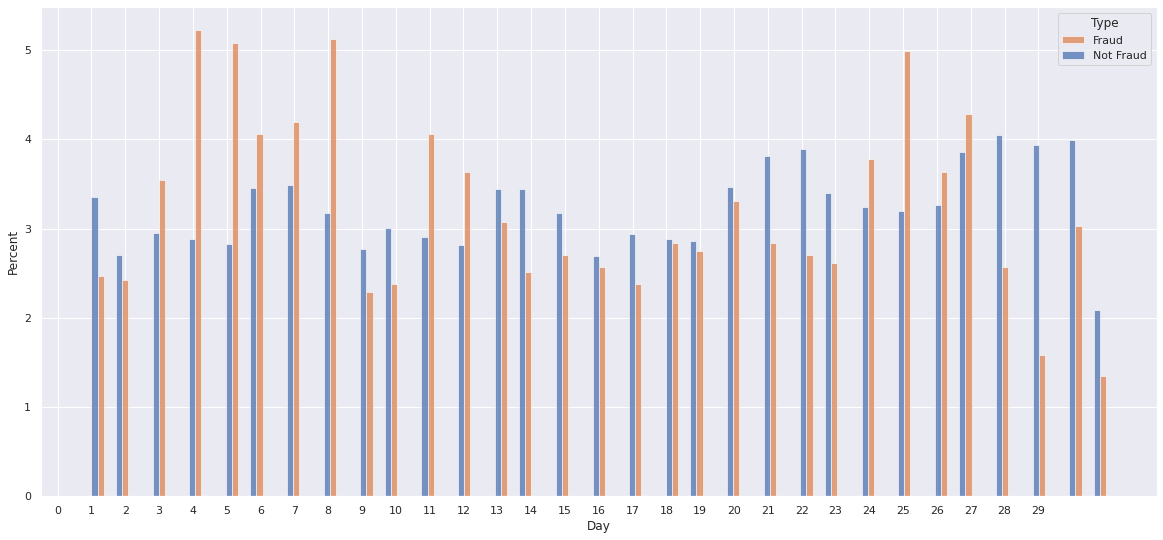

In [21]:
df["Day"]=pd.to_datetime(df["trans_date_trans_time"]).dt.day
ax=sns.histplot(x="Day",data=df,hue="is_fraud",common_norm=False,multiple='dodge',stat='percent')
plt.xticks(np.arange(0,30,1));
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

## Month vs Fraud

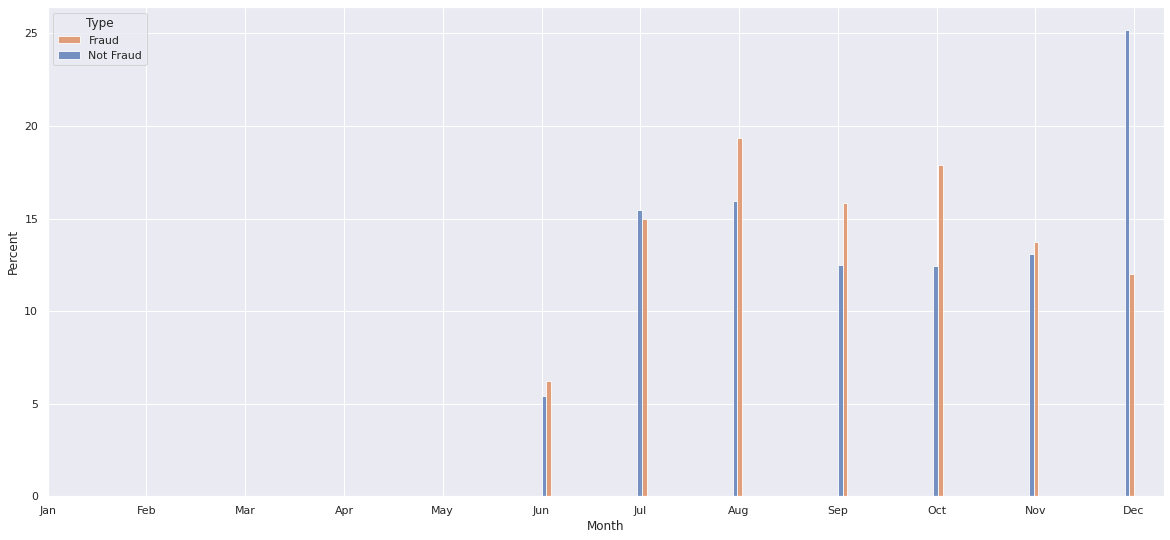

In [22]:
ax=df["Month"]=pd.to_datetime(df["trans_date_trans_time"]).dt.month
ax=sns.histplot(x="Month",data=df,hue="is_fraud",common_norm=False,multiple='dodge',stat='percent')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

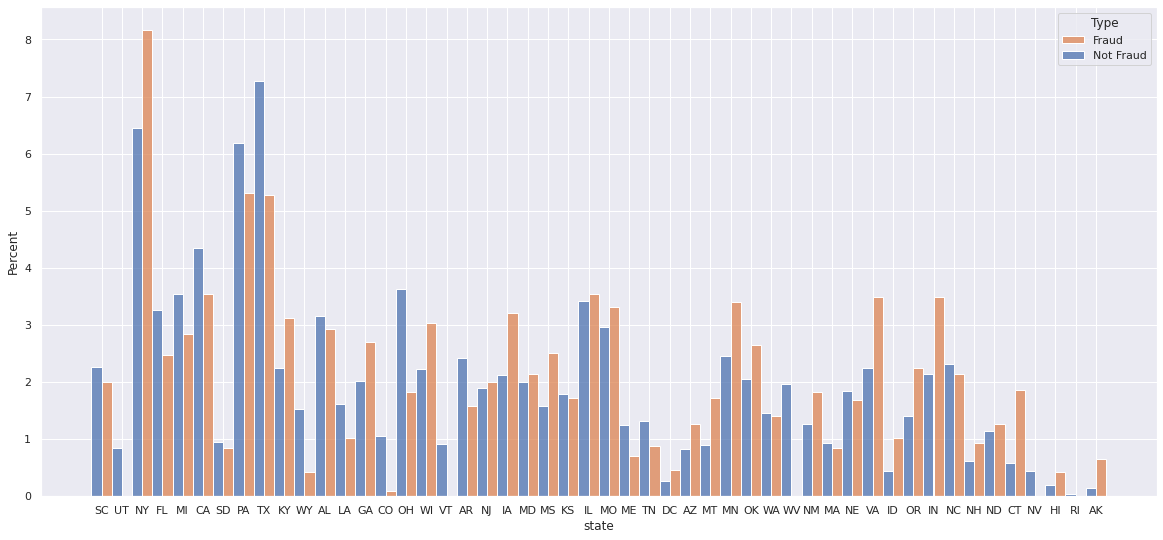

In [23]:
ax=sns.histplot(x="state",data=df,hue="is_fraud",common_norm=False,multiple='dodge',stat='percent')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [24]:
df["Minute"]=pd.to_datetime(df["trans_date_trans_time"]).dt.minute
df["Second"]=pd.to_datetime(df["trans_date_trans_time"]).dt.second
df["Year"]=pd.to_datetime(df["trans_date_trans_time"]).dt.year

In [25]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'Hour', 'Day', 'Month',
       'Minute', 'Second', 'Year'],
      dtype='object')

In [26]:
df.drop("trans_date_trans_time",axis=1,inplace=True)

In [27]:
df.drop("Unnamed: 0",axis=1,inplace=True)

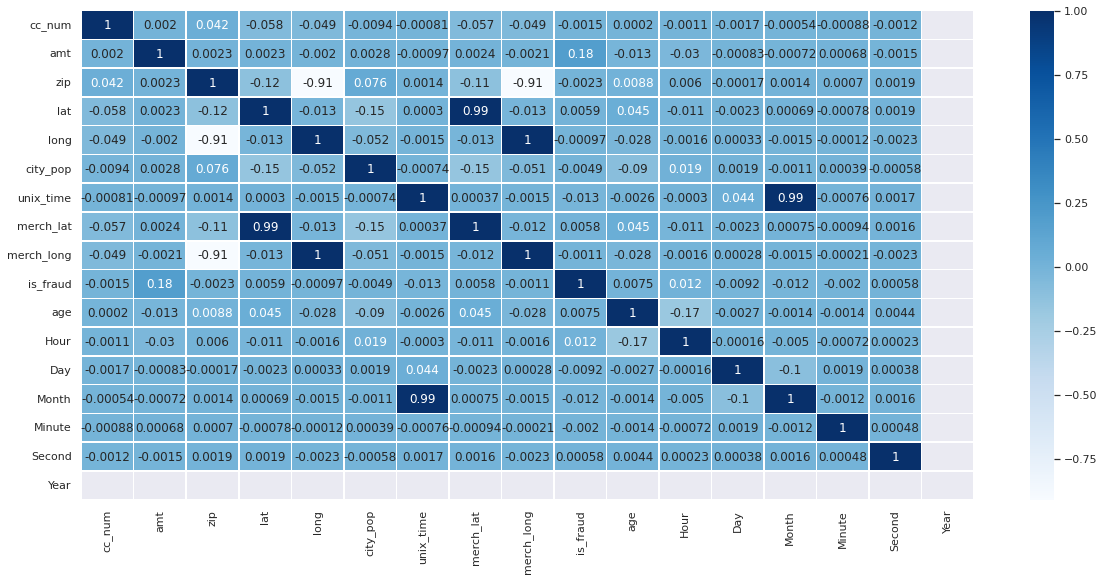

In [28]:
sns.heatmap(df.corr(),annot=True, linewidths=0.5, cmap = "Blues")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      555719 non-null  int64  
 1   merchant    555719 non-null  object 
 2   category    555719 non-null  object 
 3   amt         555719 non-null  float64
 4   first       555719 non-null  object 
 5   last        555719 non-null  object 
 6   gender      555719 non-null  object 
 7   street      555719 non-null  object 
 8   city        555719 non-null  object 
 9   state       555719 non-null  object 
 10  zip         555719 non-null  int64  
 11  lat         555719 non-null  float64
 12  long        555719 non-null  float64
 13  city_pop    555719 non-null  int64  
 14  job         555719 non-null  object 
 15  dob         555719 non-null  object 
 16  trans_num   555719 non-null  object 
 17  unix_time   555719 non-null  int64  
 18  merch_lat   555719 non-null  float64
 19  me

In [30]:
num=[]
for label , content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
    df[label]=content.astype("category").cat.as_ordered()


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   cc_num      555719 non-null  int64   
 1   merchant    555719 non-null  category
 2   category    555719 non-null  category
 3   amt         555719 non-null  float64 
 4   first       555719 non-null  category
 5   last        555719 non-null  category
 6   gender      555719 non-null  category
 7   street      555719 non-null  category
 8   city        555719 non-null  category
 9   state       555719 non-null  category
 10  zip         555719 non-null  int64   
 11  lat         555719 non-null  float64 
 12  long        555719 non-null  float64 
 13  city_pop    555719 non-null  int64   
 14  job         555719 non-null  category
 15  dob         555719 non-null  category
 16  trans_num   555719 non-null  category
 17  unix_time   555719 non-null  int64   
 18  merch_lat   555719 non-n

In [32]:
for label , content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
    df[label]=pd.Categorical(content).codes+1

In [33]:
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_lat,merch_long,is_fraud,age,Hour,Day,Month,Minute,Second,Year
0,2291163933867244,320,11,2.86,152,116,2,342,158,40,...,33.986391,-81.200714,0,54,12,21,6,14,25,2020
1,3573030041201292,592,11,29.84,164,458,1,355,17,44,...,39.450498,-109.960431,0,32,12,21,6,14,33,2020
2,3598215285024754,612,6,41.28,25,250,1,866,62,34,...,40.495810,-74.196111,0,52,12,21,6,14,53,2020
3,3591919803438423,223,10,60.05,43,458,2,321,765,9,...,28.812398,-80.883061,0,35,12,21,6,15,15,2020
4,3526826139003047,293,14,3.19,248,262,2,549,248,22,...,44.959148,-85.884734,0,67,12,21,6,15,17,2020


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      555719 non-null  int64  
 1   merchant    555719 non-null  int16  
 2   category    555719 non-null  int8   
 3   amt         555719 non-null  float64
 4   first       555719 non-null  int16  
 5   last        555719 non-null  int16  
 6   gender      555719 non-null  int8   
 7   street      555719 non-null  int16  
 8   city        555719 non-null  int16  
 9   state       555719 non-null  int8   
 10  zip         555719 non-null  int64  
 11  lat         555719 non-null  float64
 12  long        555719 non-null  float64
 13  city_pop    555719 non-null  int64  
 14  job         555719 non-null  int16  
 15  dob         555719 non-null  int16  
 16  trans_num   555719 non-null  int32  
 17  unix_time   555719 non-null  int64  
 18  merch_lat   555719 non-null  float64
 19  me

In [35]:
df.isna().sum()

cc_num        0
merchant      0
category      0
amt           0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
age           0
Hour          0
Day           0
Month         0
Minute        0
Second        0
Year          0
dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [37]:
x=df.drop("is_fraud",axis=1)
y=df["is_fraud"]

np.random.seed(52)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [38]:
models={
   "LogisticRegression":LogisticRegression(),
   "DecisionTreeClassifier":DecisionTreeClassifier(),
   "RandomForestClassifier":RandomForestClassifier(),
   "GaussianNB":GaussianNB()
}
results={}

In [39]:
for model_name ,model in models.items():
  model.fit(x_train,y_train)
  results[model_name]=model.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [40]:
results

{'LogisticRegression': 0.9961671345281796,
 'DecisionTreeClassifier': 0.9979216152019003,
 'RandomForestClassifier': 0.9985244367667171,
 'GaussianNB': 0.9961671345281796}

In [41]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
def msle(y_test, y_preds):
    return mean_squared_log_error(y_test, y_preds)

# Create function to evaluate our model
def show_scores(model):
    
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "test MAE": mean_absolute_error(y_valid, test_preds),
              "Training RMSLE": msle(y_train, train_preds),
              "test RMSLE": msle(y_valid, test_preds),
              "Training R^2": model.score(x_train, y_train),
              "test R^2": model.score(x_test, y_test)}
    return scores

In [42]:
test_data=pd.read_csv(os.path.join("drive/MyDrive/CredirCard/archive (3)/fraudTest.csv"))

In [43]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [44]:
test_data['Second']=pd.to_datetime(test_data["trans_date_trans_time"]).dt.second
test_data['Hour']=pd.to_datetime(test_data["trans_date_trans_time"]).dt.hour
test_data['Minute']=pd.to_datetime(test_data["trans_date_trans_time"]).dt.minute
test_data['Day']=pd.to_datetime(test_data["trans_date_trans_time"]).dt.day
test_data['Month']=pd.to_datetime(test_data["trans_date_trans_time"]).dt.month
test_data['year']=pd.to_datetime(test_data["trans_date_trans_time"]).dt.year

In [45]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'age', 'Hour', 'Day', 'Month', 'Minute', 'Second', 'Year'],
      dtype='object')

In [46]:
df

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_lat,merch_long,is_fraud,age,Hour,Day,Month,Minute,Second,Year
0,2291163933867244,320,11,2.86,152,116,2,342,158,40,...,33.986391,-81.200714,0,54,12,21,6,14,25,2020
1,3573030041201292,592,11,29.84,164,458,1,355,17,44,...,39.450498,-109.960431,0,32,12,21,6,14,33,2020
2,3598215285024754,612,6,41.28,25,250,1,866,62,34,...,40.495810,-74.196111,0,52,12,21,6,14,53,2020
3,3591919803438423,223,10,60.05,43,458,2,321,765,9,...,28.812398,-80.883061,0,35,12,21,6,15,15,2020
4,3526826139003047,293,14,3.19,248,262,2,549,248,22,...,44.959148,-85.884734,0,67,12,21,6,15,17,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,508,6,43.77,236,316,2,532,444,24,...,39.946837,-91.333331,0,56,23,31,12,59,7,2020
555715,3556613125071656,265,8,111.84,172,425,2,541,402,43,...,29.661049,-96.186633,0,23,23,31,12,59,9,2020
555716,6011724471098086,497,8,86.88,19,240,1,127,105,47,...,46.658340,-119.715054,0,41,23,31,12,59,15,2020
555717,4079773899158,76,14,7.99,112,343,2,664,477,13,...,44.470525,-117.080888,0,57,23,31,12,59,24,2020


In [47]:
for label , content in test_data.items():
   if not pd.api.types.is_numeric_dtype(content):
    test_data[label]=content.astype("category").cat.as_ordered()

In [48]:
for label , content in test_data.items():
   if not pd.api.types.is_numeric_dtype(content):
    test_data[label]=pd.Categorical(content).codes+1

In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  int32  
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  int16  
 4   category               555719 non-null  int8   
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  int16  
 7   last                   555719 non-null  int16  
 8   gender                 555719 non-null  int8   
 9   street                 555719 non-null  int16  
 10  city                   555719 non-null  int16  
 11  state                  555719 non-null  int8   
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [50]:
x=df.drop("is_fraud",axis=1)
y=df["is_fraud"]

np.random.seed(52)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((444575, 27), (111144, 27), (444575,), (111144,))

In [51]:
models={
   "LogisticRegression":LogisticRegression(),
   "DecisionTreeClassifier":DecisionTreeClassifier(),
   "RandomForestClassifier":RandomForestClassifier(),
   "GaussianNB":GaussianNB()
}
results={}

In [52]:
for model_name ,model in models.items():
  model.fit(x_train,y_train)
  results[model_name]=model.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [53]:
results

{'LogisticRegression': 0.9961671345281796,
 'DecisionTreeClassifier': 0.9979216152019003,
 'RandomForestClassifier': 0.9985244367667171,
 'GaussianNB': 0.9961671345281796}

In [67]:
from sklearn.model_selection import RandomizedSearchCV
grid={
    "n_estimators":[10,100,200,500,1000,1200],
    "max_depth":[None,5,10,20,30],
    "max_features":["auto","sqrt"],
    "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,2,4]
    
}
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)

# rs_log_leg= RandomizedSearchCV(estimator=model,param_distributions=grid,n_iter=5)


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.98      0.63      0.77       426

    accuracy                           1.00    111144
   macro avg       0.99      0.81      0.88    111144
weighted avg       1.00      1.00      1.00    111144

